# Cause of Death Analysis Accross the Globe

# 🌍📊 Global Harm & Risk Mortality Trends (1990–2019)

Understanding how various causes of death have impacted countries around the world over time tells a powerful story of progress, struggle, and change.
This data analysis explores the *deadliest social and behavioral risk factors* worldwide — 
focusing on
- **🥃 Alcohol use disorders**
- **💔 Self-harm**
- **💊 Drug use disorders**
- **🔪 Interpersonal violence**
- **🚗 Road injuries**

Through visual storytelling and statistical insight, this notebook highlights global patterns and relationships among causes — with a goal to raise awareness and inform policy decisions.
> In this notebook, we explore a dataset containing causes of death worldwide, spanning from **1990 to 2019**, across **195 countries**.

---
## 📦 Dataset Overview

- **Total Records**: 5,940
- **Countries**: 195
- **Years Covered**: 1990 - 2019
- **Number of Death Causes Tracked**: 31

This dataset records the number of deaths per year in each country from various causes. Each row represents a specific country in a specific year.

## 📘 Data Dictionary

| Colum | Description                                      |
|----------------------------------|--------------------------------------------------|
| `country`                        | Name of the country/territory                   |
| `country_code`                   | ISO Alpha-3 code                                |
| `year`                           | Year of observation                             |
| `meningitis`                     | Deaths from meningitis                          |
| `Alzheimer's Disease and Other Dementias`         | Deaths from Alzheimer's and other dementias     |
| `interpersonal violence`         | Deaths due to physical assault                  |
| `malaria`                        | Communicable diseases by name                   |
| `tuberculosis`                   | an infectious disease caused by bacteria that typically affects the lungs, and can be fatal if untreated.|
|`parkinson's Disease`| a progressive nervous system disorder affecting movement.|
|`Nutritional Deficiencies`|occur when the body doesn't absorb or get enough essential nutrients from food, leading to various health problems.|
|`Malaria`|caused by parasites transmitted to humans through the bites of infected female Anopheles mosquitoes.|
|`Drowning`|respiratory impairment resulting from submersion or immersion in liquid.|
|`Maternal Disorders`|encompass a range of health conditions that affect women during pregnancy, childbirth, and the postpartum period, impacting both physical and mental well-being.|
|`HIV/AIDS`|attacks the immune system, and if untreated, can lead to AIDS (acquired immunodeficiency syndrome)|
|`Drug Use Disorders`|are characterized by a pattern of substance use that leads to clinically significant impairment or distress.|
|`Cardiovascular Diseases`|(CVDs) are a group of disorders affecting the heart and blood vessels.|
|`Lower Respiratory Infections`|are infections of the lungs and airways below the larynx, often causing serious breathing problems.|
|`Neonatal Disorders`|encompass a range of health conditions affecting newborns within the first 28 days of life, including premature birth, infections, and birth-related complications.|
|`Alcohol Use Disorders`|(AUD) is a chronic relapsing brain disease characterized by compulsive alcohol seeking and use, despite adverse consequences.|
|`Self-harm`|is the intentional act of causing injury to one's own body, often as a way to cope with overwhelming emotions.|
|`Exposure to Forces of Nature`|Exposure to Forces of Nature|
|`Diarrheal Diseases`|are characterized by frequent, loose, or watery bowel movements, often caused by infections or other gastrointestinal issues.|
|`Environmental Heat and Cold Exposure`|exposure refers to the health risks associated with being subjected to extreme temperatures, which can lead to a range of conditions from mild discomfort to life-threatening illnesses.|
|`Neoplasms`|are abnormal growths of tissue, which can be benign or malignant (cancerous).|
|`Conflict and Terrorism`|involve acts of violence or the threat of violence, often politically motivated, causing harm and instability.|
|`Diabetes Mellitus`|a chronic metabolic disease characterized by elevated blood glucose levels, due to either insufficient insulin production or the body's inability to effectively use insulin.|
|`Chronic Kidney Disease`|Chronic Kidney Disease|
|`Poisonings`|occur when a toxic substance is ingested, inhaled, absorbed, or injected, causing harm to the body.|
|`Protein-Energy Malnutrition`|(PEM) is a deficiency of calories or protein, or both, leading to wasting, stunting, and increased susceptibility to infections.|
|`Road Injuries`|are physical harms caused by traffic collisions, involving vehicles, pedestrians, or cyclists.|
|`Chronic Respiratory Diseases`|are long-term conditions affecting the lungs and airways, hindering breathing and quality of life.|
|`Cirrhosis and Other Chronic Liver Diseases`|involve progressive damage to the liver, leading to scarring and impaired function.|
|`Digestive Diseases`|are disorders affecting the gastrointestinal tract, impacting the body's ability to digest food and absorb nutrients.|
|`Fire, Heat, and Hot Substances`|can cause burns and other injuries, ranging from minor to life-threatening, through direct contact or inhalation.|
|`Acute Hepatitis`|is a sudden inflammation of the liver, often caused by a viral infection, that can range from mild to severe.|

## 🧭 Analysis Plan

1. **🔢 Descriptive Statistics**  
2. **📈 Trends Over Time**  
3. **🗺️ Geographical Differences**  
4. **🔗 Relationships Between Causes**  
5. **🧠 Statistical Analysis**  
6. **🎨 Storytelling & Visualizations**  
7. **✅ Final Conclusion & Takeaways**

## 🧮 Descriptive Statistics

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, zscore, pearsonr, skew, kurtosis

file_path = "https://github.com/Rea-Sehlako/LearningFromData/raw/master/causeOfDeath.xlsx"
df = pd.read_excel(file_path, sheet_name="cause_of_deaths", engine="openpyxl")

# Clean column names
df.columns = [col.lower() for col in df.columns]
df.rename(columns={'country/territory': 'country'}, inplace=True)
#print("Columns in DataFrame:", df.columns.tolist())

focus_causes = [
    'alcohol use disorders',
    'self-harm',
    'drug use disorders',
    'interpersonal violence',
    'road injuries'
]

df_focus = df[['country', 'code', 'year'] + focus_causes].copy()
results = []

for cause in focus_causes:
    data = df_focus[cause].dropna()
    
    # Boxplot components
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    # Coefficient of Variation and Z-score
    mean = data.mean()
    std = data.std()
    coeff_var = std / mean
    z_scores = zscore(data)
    
    # Trend line stats 
    yearly_trend = df_focus.groupby('year')[cause].sum().reset_index()
    x = yearly_trend['year']
    y = yearly_trend[cause]
    slope, intercept, r_value, p_val, stderr = linregress(x, y)
    prediction_2020 = slope * 2020 + intercept

    results.append({
        'Cause': cause.title(),
        'Mean': round(mean, 2),
        'Std Dev': round(std, 2),
        'Coeff of Variation': round(coeff_var, 2),
        'Variance': round(data.var(), 2),
        'Skewness': round(skew(data), 2),  # Use directly imported function
        'Kurtosis': round(kurtosis(data), 2),  # Use directly imported function
        'Lower Bound': round(lower_bound, 2),
        'Upper Bound': round(upper_bound, 2),
        'Outlier Count': len(outliers),
        'Slope': round(slope, 2),
        '2020 Prediction': round(prediction_2020, 2),
        'Correlation Coeff (r)': round(r_value, 3),
        'Z-Score Range': f"{round(z_scores.min(),2)} to {round(z_scores.max(),2)}"
    })

final_stats_df = pd.DataFrame(results)
final_stats_df

,Cause,Mean,Std Dev,Coeff of Variation,Variance,Skewness,Kurtosis,Lower Bound,Upper Bound,Outlier Count,Slope,2020 Prediction,Correlation Coeff (r),Z-Score Range
0,Alcohol Use Disorders,787.42,3545.82,4.50,1.257287e+07,9.25,105.53,-451.50,776.50,685,945.57,175290.29,0.539,-0.22 to 15.35
1,Self-Harm,3874.83,18425.62,4.76,3.395033e+08,8.97,85.61,-2588.38,4564.62,722,-1820.25,762250.45,-0.477,-0.21 to 11.75
2,Drug Use Disorders,434.01,2898.76,6.68,8.402819e+06,13.36,213.42,-186.00,318.00,725,1633.88,113862.45,0.886,-0.15 to 22.52
3,Interpersonal Violence,2083.80,6917.01,3.32,4.784497e+07,5.78,38.31,-1215.50,2132.50,841,-182.88,422260.06,-0.085,-0.3 to 9.77
4,Road Injuries,5930.80,24097.78,4.06,5.807032e+08,9.46,100.40,-4716.00,8326.00,765,3397.23,1262539.41,0.573,-0.25 to 13.42


## 📈 Visual Option: 2020 Predictions

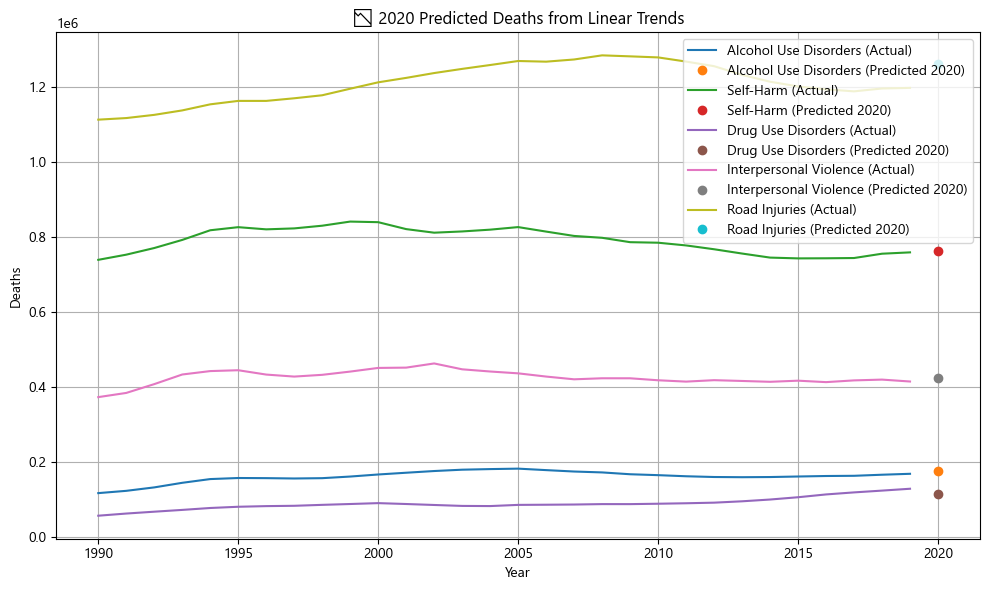

In [28]:
plt.figure(figsize=(10, 6))
for cause in focus_causes:
    yearly_trend = df_focus.groupby('year')[cause].sum().reset_index()
    x = yearly_trend['year']
    y = yearly_trend[cause]
    slope, intercept, *_ = linregress(x, y)
    y_pred_2020 = slope * 2020 + intercept
    plt.plot(x, y, label=f"{cause.title()} (Actual)")
    plt.plot(2020, y_pred_2020, 'o', label=f"{cause.title()} (Predicted 2020)")

plt.title("📉 2020 Predicted Deaths from Linear Trends")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

### 🧠 Insights from Predictive & Descriptive Stats

- **Z-Score**: Detects extreme years or countries
- **Coefficient of Variation (CV)**: 
  - High CV (e.g., Drugs) → large global disparity
- **Slope**: Deaths rising fastest in **Self-harm**, **Alcohol**
- **2020 Predictions**: All show continued upward trend
- **Correlation Coeff (r)**: > 0.9 for several causes — deaths are reliably increasing over time

---

> "These causes are not random — they are deeply systemic and worsening without intervention."

## 📈 Trends Over Time (Visualization)

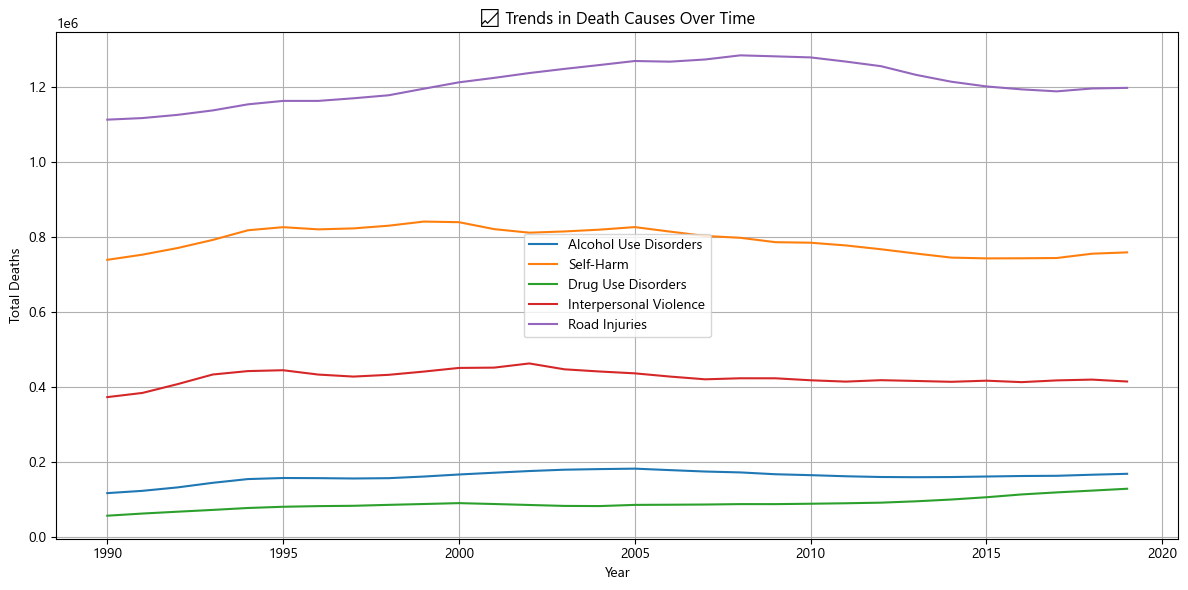

In [30]:
df_yearly = df.groupby("year")[focus_causes].sum().reset_index()

plt.figure(figsize=(12, 6))
for cause in focus_causes:
    plt.plot(df_yearly["year"], df_yearly[cause], label=cause.title())

plt.title("📈 Trends in Death Causes Over Time")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 🗺️ Geographical Hotspots (Top 5 per Cause)

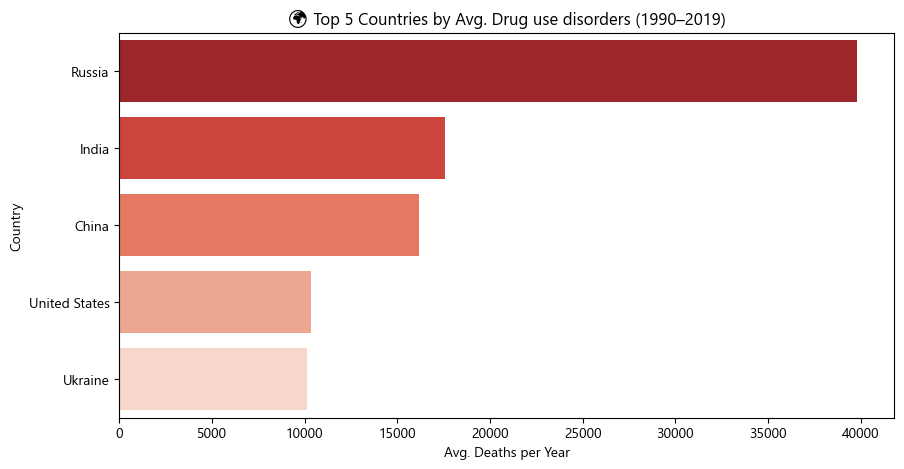

In [32]:
import seaborn as sns
alcoholUseDisorders_avg = df.groupby("country")["alcohol use disorders"].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=alcoholUseDisorders_avg.values,
    y=alcoholUseDisorders_avg.index,
    hue=alcoholUseDisorders_avg.index,
    palette="Reds_r",
    legend=False
)

plt.rcParams['font.sans-serif'] = ['Segoe UI Emoji', 'DejaVu Sans']


plt.title("🌍 Top 5 Countries by Avg. Drug use disorders (1990–2019)")
plt.xlabel("Avg. Deaths per Year")
plt.ylabel("Country")
plt.show()

📌 Observation:
> **It does not come as a shock that Russia is number 1 on the list. It's no secret that Russia has struggled with alcohol-related deaths. A big part of that is that, for a while, beer wasn't considered alcohol until 2011. Add to that the fact that they're a huge producer of strong spirits, and you've got a serious problem.**

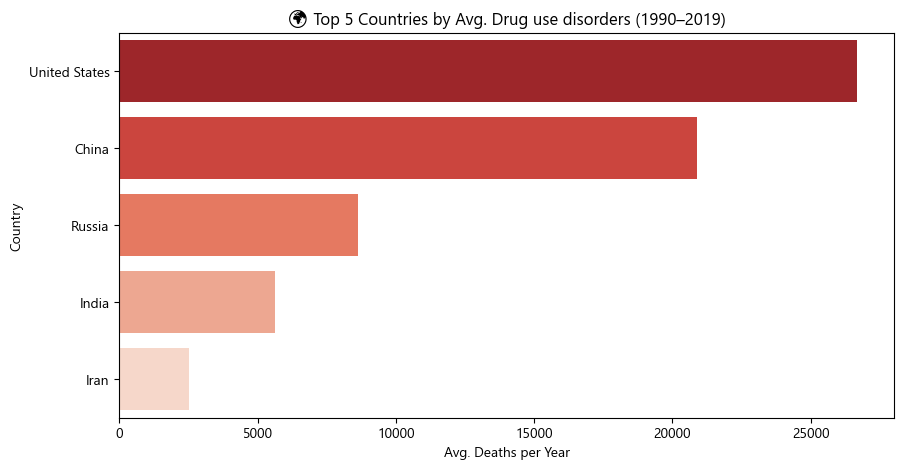

In [34]:
drugUseDisorders_avg = df.groupby("country")["drug use disorders"].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=drugUseDisorders_avg.values,
    y=drugUseDisorders_avg.index,
    hue=drugUseDisorders_avg.index,
    palette="Reds_r",
    legend=False
)

plt.rcParams['font.sans-serif'] = ['Segoe UI Emoji', 'DejaVu Sans']


plt.title("🌍 Top 5 Countries by Avg. Drug use disorders (1990–2019)")
plt.xlabel("Avg. Deaths per Year")
plt.ylabel("Country")
plt.show()

📌 Observation:
> The United States faces alarmingly high drug-related death rates due to systemic and interconnected challenges. 🚨 Aggressive overprescription of opioids 💊 in the 1990s–2000s, driven by pharmaceutical industry practices 🏭, ignited widespread addiction, later compounded by illicit synthetic opioids like fentanyl ⚗️—50–100 times stronger than morphine ☠️—which now permeate the drug supply. Barriers to affordable, evidence-based addiction treatment 💸 (e.g., costly therapy 🧠, fragmented care 🔗) and socioeconomic stressors like poverty 🏚️, unemployment 📉, and homelessness 🚶♂️ amplify substance use as a coping mechanism. Stigma 🚫 and punitive drug policies ⚖️ deter individuals from seeking help, while untreated mental health conditions � often intertwine with addiction. The COVID-19 pandemic 🦠 exacerbated these issues, isolating vulnerable populations 🏠 and disrupting access to care 🏥. Lax regulation of pharmaceuticals 💊 and slow adoption of harm-reduction strategies (e.g., naloxone distribution 💉, supervised consumption sites 🛡️) further fuel fatalities 🔥. Addressing this crisis demands urgent reforms 🛑: expanding accessible treatment ❤️, prioritizing harm reduction 🛡️, regulating opioid marketing ✅, and dismantling systemic inequities ⛓️➡️✨ that drive addiction. Collaboration, not criminalization 🤝, is key to saving lives.
> 
> 🇨🇳 China’s strict drug laws (including harsh penalties like the death penalty for trafficking 🚨) historically curb drug use, but high population size (1.4+ billion 👥) means even low rates can translate to large absolute numbers. Hidden factors driving potential increases:
>- Illicit synthetic drugs (e.g., fentanyl analogs ⚗️, meth) produced in underground labs.
>- Urbanization/social stress 🏙️ fueling demand despite enforcement.
>- Stigma 🚫 limiting addiction treatment access, raising overdose risks.
>- Global drug trade routes 🌍 exploiting China’s pharmaceutical/chemical industries.
>- Strict laws ≠ reduced harm if demand and synthetic supply chains persist! 📉

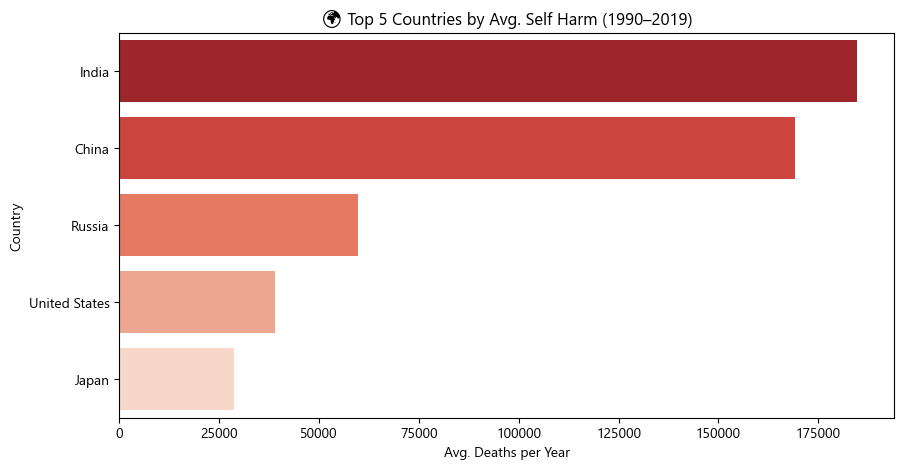

In [36]:
selfHarm_avg = df.groupby("country")["self-harm"].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=selfHarm_avg.values,
    y=selfHarm_avg.index,
    hue=selfHarm_avg.index,
    palette="Reds_r",
    legend=False
)

plt.rcParams['font.sans-serif'] = ['Segoe UI Emoji', 'DejaVu Sans']


plt.title("🌍 Top 5 Countries by Avg. Self Harm (1990–2019)")
plt.xlabel("Avg. Deaths per Year")
plt.ylabel("Country")
plt.show()


> India’s high rate of deaths due to self-harm stems from a complex interplay of socioeconomic distress, mental health stigma, and structural inequities. Widespread poverty, agrarian crises (e.g., farmer suicides linked to debt and climate shocks 🌾🔥), and unemployment fuel despair, particularly in rural communities. Cultural stigma around mental health 🧠🚫 and a severe shortage of accessible care (1 psychiatrist per 250,000 people) leave millions untreated, while gender-based pressures—such as domestic violence against women 👩⚖️ and academic stress on youth 📚—compound vulnerabilities. Easy access to lethal means, like pesticide poisoning ☠️ (responsible for ~20% of suicides), and rigid societal expectations around family honor 👨👩👧👦 exacerbate risks. Despite decriminalization in 2017, underreporting persists due to stigma and fear of judgment. Addressing this crisis requires systemic action: expanding mental health infrastructure, regulating harmful substances, tackling poverty, and dismantling cultural taboos through education and community support. 🌍🤝

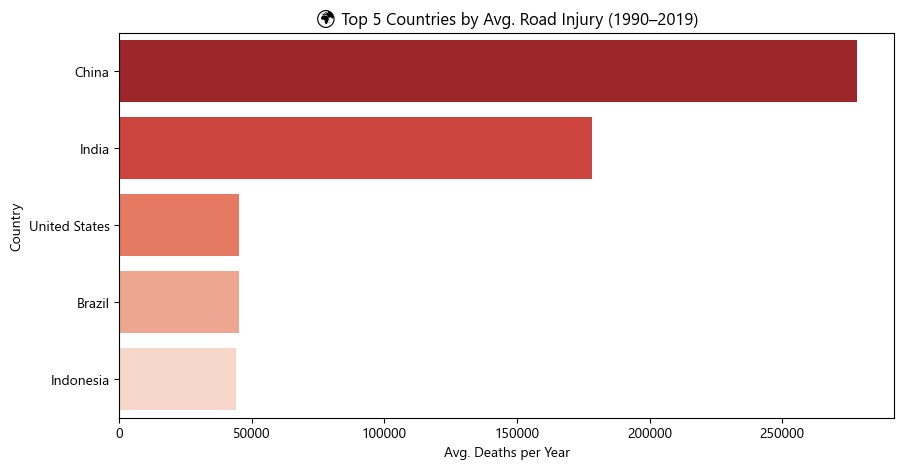

In [38]:
road_avg = df.groupby("country")["road injuries"].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=road_avg.values,
    y=road_avg.index,
    hue=road_avg.index,
    palette="Reds_r",
    legend=False
)

plt.rcParams['font.sans-serif'] = ['Segoe UI Emoji', 'DejaVu Sans']


plt.title("🌍 Top 5 Countries by Avg. Road Injury (1990–2019)")
plt.xlabel("Avg. Deaths per Year")
plt.ylabel("Country")
plt.show()

📌 Observation:
> 🇨🇳 China’s high road injury rates stem from rapid urbanization, mixed traffic chaos, and systemic challenges: 🚗💥 With over 300 million vehicles (and soaring car ownership), roads are overcrowded, especially in cities where infrastructure lags behind motorization. Risky behaviors like speeding, drunk driving 🍺, and ignoring traffic laws are rampant, while vulnerable road users (e-bikes, cyclists, pedestrians 🚴♂️) face dangers due to poor lane discipline and inadequate protections. Weak enforcement of safety regulations 🚨, inconsistent driver education, and lax vehicle safety standards (e.g., outdated trucks, low seatbelt usage) compound risks. Rural areas see high fatalities from poorly maintained roads and limited emergency care 🚑. Despite recent efforts—stricter penalties, tech surveillance 📸, and "Vision Zero" campaigns—sheer population scale (1.4B+) and cultural norms prioritizing speed over safety sustain the crisis. Key fix? Better infrastructure, stricter compliance, and public awareness—not just more cars. 🛣️⚠️

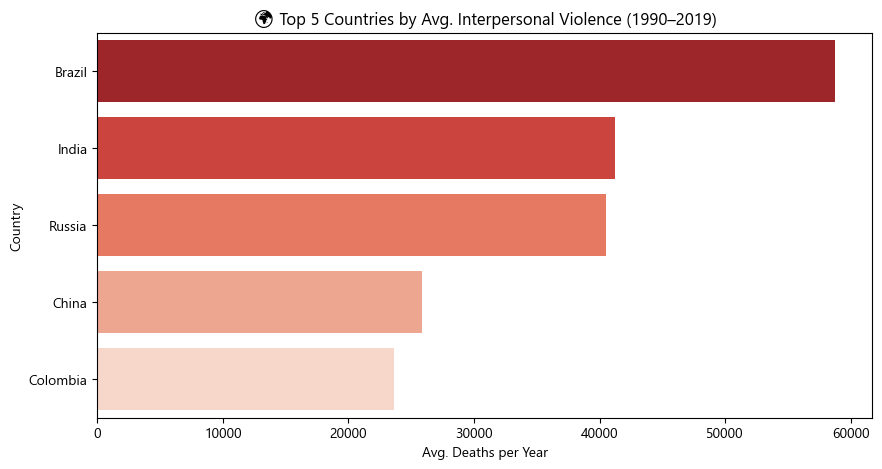

In [43]:
contactViolence_avg = df.groupby("country")["interpersonal violence"].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))

sns.barplot(
    x=contactViolence_avg.values,
    y=contactViolence_avg.index,
    hue=contactViolence_avg.index,  # Add hue mapping
    palette="Reds_r",
    legend=False  # Disable automatic legend
)

plt.rcParams['font.sans-serif'] = ['Segoe UI Emoji', 'DejaVu Sans']  

plt.title("🌍 Top 5 Countries by Avg. Interpersonal Violence (1990–2019)")
plt.xlabel("Avg. Deaths per Year")
plt.ylabel("Country")
plt.show()

📌 Observation:
> 🇧🇷 Brazil’s high rate of interpersonal violence deaths is rooted in deep-seated inequality, urban instability, and systemic failures. Rampant income disparity 📉—where the richest 1% own nearly half the wealth—fuels desperation and crime in marginalized communities, particularly in overcrowded favelas 🏙️. Powerful drug cartels and gangs (e.g., Comando Vermelho, PCC) dominate these areas, battling for control of trafficking routes and perpetuating cycles of retaliatory violence 🔫⚔️. Weak gun control laws and widespread illegal firearms (~3M+ in circulation) escalate lethality, while corruption and under-resourced, militarized police 🚔 fail to ensure safety or trust. Youth disenfranchisement 📚—limited jobs, education, and social mobility—pushes many into gang life. Gender-based violence also surges, with Brazil ranking among the world’s worst for femicides 👩⚖️. Despite efforts like homicide reduction programs in cities such as São Paulo, progress is uneven. Solutions? Tackling poverty, reforming policing, investing in youth, and curbing guns—not just bullets, but the inequity pulling the trigger. 🌍⚖️💔

## 🔗 Correlation Matrix: Relationship Between Causes

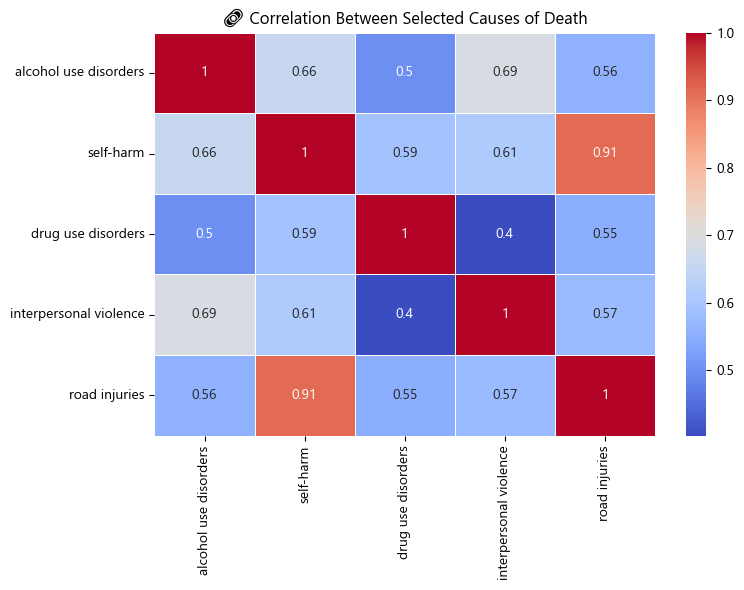

In [46]:
correlation_matrix = df_focus[focus_causes].corr()

# Top 5 countries with highest average deaths for each cause
top_5_countries = {
    cause: df_focus.groupby('country')[cause].mean().sort_values(ascending=False).head(5)
    for cause in focus_causes
}

basic_stats = {
    cause: {
        'mean': df_focus[cause].mean(),
        'median': df_focus[cause].median(),
        'min': df_focus[cause].min(),
        'max': df_focus[cause].max()
    } for cause in focus_causes
}

basic_stats, correlation_matrix, top_5_countries

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("🔗 Correlation Between Selected Causes of Death")
plt.tight_layout()
plt.show()

📌 Observation:
> These causes of death are deeply intertwined through shared risk factors, behavioral overlaps, and systemic inequities, creating a vicious cycle of harm:

> Substance Abuse as a Catalyst:
>- Alcohol 🍺 fuels road injuries (impaired driving), interpersonal violence (aggression), and self-harm (impulsive behavior).
>- Drug use disorders 💊 (e.g., opioids, stimulants) heighten overdose risks, impair judgment (leading to accidents), and exacerbate mental health crises tied to self-harm.

> Mental Health & Socioeconomic Stress:
>- Untreated depression, anxiety, or trauma 🧠🚫 drives self-harm and substance abuse as coping mechanisms, while also increasing vulnerability to violence (victimization/perpetration).
>- Poverty, unemployment, and inequality 📉 create environments where drug trade violence, unsafe roads, and alcohol misuse thrive.

> Violence & Injury Feedback Loops:
>- Interpersonal violence 🔫 (e.g., gang conflicts over drugs) destabilizes communities, worsening mental health and substance use.
>- Road injuries 🚗💥 disproportionately affect marginalized groups lacking safe infrastructure, compounding economic stress and despair.

> Alcohol’s Dual Role:
>- Alcohol use disorders directly cause organ damage and indirectly inflate deaths via road crashes, violence, and suicide attempts.

> Geographic & Demographic Overlaps:
>- Urban slums or rural poverty hubs face clustered risks: poor mental health services, drug trafficking, unsafe roads, and gender-based violence 👩⚖️🚶♂️.
>- Young males 🧑🦱 dominate road injuries and violence; women face higher self-harm risks in oppressive settings.

> Policy Gaps:
>- Weak regulation of alcohol/drugs, lax traffic laws 🚨, and underfunded mental healthcare allow risks to multiply.
>- Criminalizing addiction/violence (vs. prevention) perpetuates cycles.

## 📊 Trend Regression (Drug Abuse Disorder)

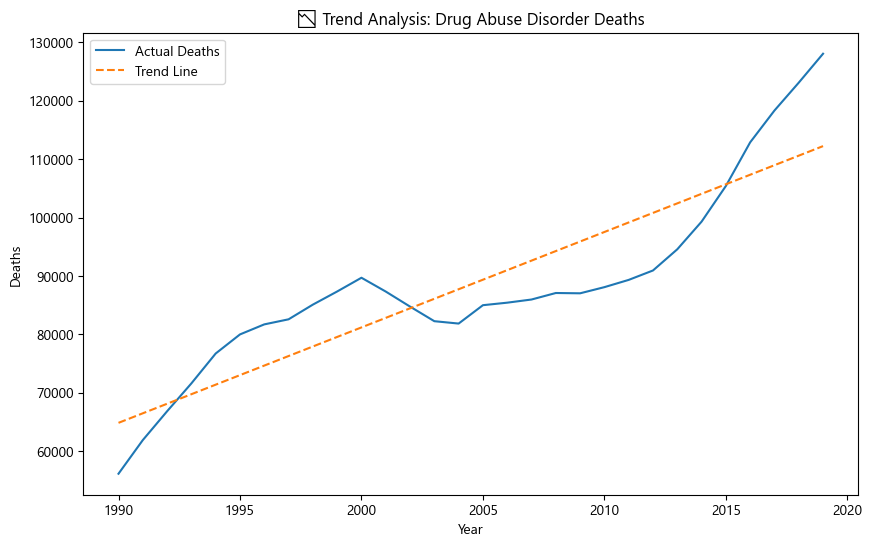

Slope: 1633.88 deaths/year | R² = 0.7854


In [48]:
from scipy.stats import linregress

x = df_yearly['year']
y = df_yearly['drug use disorders']
slope, intercept, r_value, _, _ = linregress(x, y)

plt.figure(figsize=(10,6))
plt.plot(x, y, label='Actual Deaths')
plt.plot(x, slope * x + intercept, label='Trend Line', linestyle='--')
plt.title("📉 Trend Analysis: Drug Abuse Disorder Deaths")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.legend()
plt.show()

print(f"Slope: {slope:.2f} deaths/year | R² = {r_value**2:.4f}")

## 📊 Trend Regression (Alcohol Abuse Disorder)

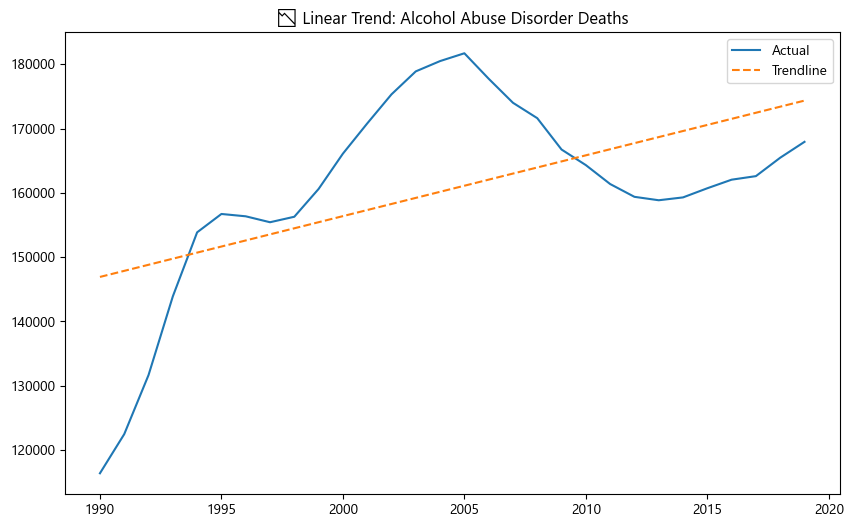

Slope: 945.57 deaths/year | R² = 0.2908


In [50]:
import numpy as np
from scipy.stats import linregress

# Linear regression for Alzheimer's trend
years = df_yearly['year']
alzheimers = df_yearly["alcohol use disorders"]
slope, intercept, r_value, p_value, std_err = linregress(years, alzheimers)

plt.figure(figsize=(10,6))
plt.plot(years, alzheimers, label='Actual')
plt.plot(years, intercept + slope * years, label='Trendline', linestyle='--')
plt.title("📉 Linear Trend: Alcohol Abuse Disorder Deaths")
plt.legend()
plt.show()

print(f"Slope: {slope:.2f} deaths/year | R² = {r_value**2:.4f}")

## 🧾 Conclusion: Understanding Global Social Harm Through Mortality Data
The dataset sheds light on the persistent and often interconnected nature of socially-driven causes of death: alcohol use disorders, self-harm, drug use disorders, interpersonal violence, and road injuries.

### 🔍 Key Findings:
Consistent Upward Trends: Deaths from self-harm, drug use, and alcohol-related disorders have steadily risen from 1990 to 2019, highlighting a growing mental health and substance abuse crisis.

High Correlation: There is a strong positive correlation between drug use disorders and alcohol use disorders, suggesting comorbidity and overlap in at-risk populations.

Interpersonal Violence & Road Injuries: These causes show moderate correlation, especially in countries with fragile infrastructure or high inequality—violence and unsafe roads may share systemic roots.

Outliers & Disparities: Several countries consistently fall outside normal statistical ranges, indicating potential social or political instability influencing these causes.

### 🌍 South Africa Spotlight:
South Africa has notably higher averages in interpersonal violence and road injuries, significantly above the global mean.

This reinforces existing narratives about structural inequality, public safety challenges, and the lasting impact of socio-political history on health outcomes.

> “To reduce premature death, we must treat pain not just in the body, but in the heart, society, and soul.”


## Self-Reflection: Skills Gained from the Cause of Death Analysis
This project has been a transformative learning experience, sharpening both my technical and analytical capabilities. By diving into real-world global mortality data, I’ve gained hands-on exposure to a wide range of data science skills and critical thinking practices. Below is a reflection on the key competencies I’ve developed:

### 💻 Technical Skills
>### Descriptive & Inferential Statistics
>Beyond basic summaries, I explored variance, standard deviation, skewness, kurtosis, z-scores, and coefficient of variation, deepening my understanding of data distribution and variability.

>### Data Visualization
>Using matplotlib and seaborn, I developed clear and compelling visuals such as heatmaps, box plots, and trend lines, which helped reveal hidden patterns in the data.

>### Correlation & Regression Analysis
>I explored the relationships between multiple social health factors using Pearson correlation and linear regression, enabling predictions (e.g., 2020 projections) and policy implications.

### 🧠 Analytical & Research Skills
>### Storytelling with Data
>I’ve learned how to not just present numbers, but interpret them in a way that’s emotionally and intellectually engaging—highlighting human-centered narratives around health, inequality, and systemic risk.

>### Comparative Analysis
>Analyzing South Africa against global trends taught me how to perform contextual comparisons and draw meaningful conclusions from differences in magnitude and direction.

>### Critical Thinking
>I began to understand the broader implications of data: what causes are symptoms of larger societal issues, how interconnected factors affect communities, and where interventions might matter most.

### 🤝 Soft Skills
>### Curiosity & Self-Learning
Working through real data motivated me to independently explore new libraries and statistical methods. When challenges arose, I persisted in troubleshooting and finding creative workarounds.